In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import optuna
import copy
import random
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, f1_score, confusion_matrix, roc_auc_score
pd.set_option('display.max_columns', None)

In [ ]:
train_val_df = pd.read_csv('/content/drive/MyDrive/finetuned_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/finetuned_test_with_structured_final.csv')

[INFO] Device: cuda
[INFO] Final Train/Val Shape: torch.Size([146089, 825])
[INFO] Final Test Shape: torch.Size([16233, 825])

 STARTING NESTED CROSS-VALIDATION

[FOLD 1/5] Starting outer fold...


[I 2025-05-10 14:32:43,171] A new study created in memory with name: no-name-60965631-0974-49fa-8492-f709b6dd95c5


[FOLD 1/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 14:35:38,812] Trial 0 finished with value: 0.8880240574998884 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.15837523024567027, 'optimizer': 'Adam', 'lr': 3.732030572265426e-05, 'weight_decay': 7.64148102864675e-05, 'batch_size': 128}. Best is trial 0 with value: 0.8880240574998884.


Starting Trial #2/50


[I 2025-05-10 14:37:19,105] Trial 1 finished with value: 0.8891148155239689 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3009877213975631, 'optimizer': 'Adam', 'lr': 0.00020721269766617754, 'weight_decay': 0.00022943061942217366, 'batch_size': 256}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #3/50


[I 2025-05-10 14:38:28,543] Trial 2 finished with value: 0.889071719328823 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.3556536374330823, 'optimizer': 'Adam', 'lr': 0.00033165303727554247, 'weight_decay': 5.092726955905121e-06, 'batch_size': 512}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #4/50


[I 2025-05-10 14:41:22,129] Trial 3 finished with value: 0.8885520908307866 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.27281744946896236, 'optimizer': 'Adam', 'lr': 0.0009919527184294751, 'weight_decay': 1.0932691024146727e-05, 'batch_size': 128}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #5/50


[I 2025-05-10 14:43:57,912] Trial 4 finished with value: 0.8887200006712654 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.3341040523661568, 'optimizer': 'AdamW', 'lr': 4.793279352295011e-05, 'weight_decay': 1.572524346750595e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #6/50


[I 2025-05-10 14:44:15,249] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 14:44:41,246] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 14:44:49,861] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 14:46:33,685] Trial 8 finished with value: 0.8885376875439689 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2117589178464881, 'optimizer': 'AdamW', 'lr': 0.00014221230487528966, 'weight_decay': 5.775696225521841e-06, 'batch_size': 256}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #10/50


[I 2025-05-10 14:46:59,624] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 14:47:10,366] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 14:47:21,243] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 14:47:32,262] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 14:47:40,754] Trial 13 pruned. 


Starting Trial #15/50


[I 2025-05-10 14:48:50,821] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 14:49:00,377] Trial 15 pruned. 


Starting Trial #17/50


[I 2025-05-10 14:50:35,971] Trial 16 finished with value: 0.8884385993238885 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.2615015930444443, 'optimizer': 'Adam', 'lr': 0.00036663414119181184, 'weight_decay': 4.2739992821651624e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #18/50


[I 2025-05-10 14:50:44,603] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 14:52:07,696] Trial 18 finished with value: 0.8882990190684165 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.309671886247219, 'optimizer': 'AdamW', 'lr': 0.0005487407775330333, 'weight_decay': 1.0275404200698878e-06, 'batch_size': 256}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #20/50


[I 2025-05-10 14:52:16,229] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 14:53:30,934] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 14:55:06,187] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 14:55:17,924] Trial 22 pruned. 


Starting Trial #24/50


[I 2025-05-10 14:55:29,607] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 14:55:44,401] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 14:57:02,857] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 14:58:13,424] Trial 26 finished with value: 0.8886049697048972 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.2866708979287819, 'optimizer': 'AdamW', 'lr': 0.0005415314859889872, 'weight_decay': 5.910704831455098e-05, 'batch_size': 512}. Best is trial 1 with value: 0.8891148155239689.


Starting Trial #28/50


[I 2025-05-10 14:58:24,372] Trial 27 pruned. 


Starting Trial #29/50


[I 2025-05-10 14:58:37,054] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 14:58:45,845] Trial 29 pruned. 



[FOLD 1/5] Best hyperparameters:
  - n_layers: 2
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.3009877213975631
  - optimizer: Adam
  - lr: 0.00020721269766617754
  - weight_decay: 0.00022943061942217366
  - batch_size: 256

[FOLD 1/5] Training model with best hyperparameters...

[FOLD 1/5] Results: F1=0.8907, AUC=0.9325

[FOLD 2/5] Starting outer fold...


[I 2025-05-10 14:59:33,642] A new study created in memory with name: no-name-96008bc5-6baf-4a36-b6bf-e803e81d4b06


[FOLD 2/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 15:01:13,313] Trial 0 finished with value: 0.8892339597705701 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.3598016358323435, 'optimizer': 'AdamW', 'lr': 0.00024823305890793245, 'weight_decay': 0.00012930932135262835, 'batch_size': 256}. Best is trial 0 with value: 0.8892339597705701.


Starting Trial #2/50


[I 2025-05-10 15:03:26,858] Trial 1 finished with value: 0.8898165031337567 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.14160783163378368, 'optimizer': 'AdamW', 'lr': 9.73708151217481e-05, 'weight_decay': 0.00032986172648296025, 'batch_size': 128}. Best is trial 1 with value: 0.8898165031337567.


Starting Trial #3/50


[I 2025-05-10 15:07:06,873] Trial 2 finished with value: 0.8896807977849538 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.26654979312365296, 'optimizer': 'AdamW', 'lr': 2.4138963715314244e-05, 'weight_decay': 3.2493035922080044e-05, 'batch_size': 512}. Best is trial 1 with value: 0.8898165031337567.


Starting Trial #4/50


[I 2025-05-10 15:09:03,363] Trial 3 finished with value: 0.8881507126075361 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.2012647323552446, 'optimizer': 'AdamW', 'lr': 0.00098986722910424, 'weight_decay': 1.5798371879292558e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8898165031337567.


Starting Trial #5/50


[I 2025-05-10 15:11:47,625] Trial 4 finished with value: 0.8900575961123961 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3180037686992758, 'optimizer': 'Adam', 'lr': 0.0001717740924187402, 'weight_decay': 3.502346424842187e-05, 'batch_size': 128}. Best is trial 4 with value: 0.8900575961123961.


Starting Trial #6/50


[I 2025-05-10 15:12:05,993] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 15:12:25,474] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 15:12:45,039] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 15:13:05,455] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 15:13:23,610] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 15:13:32,738] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 15:16:46,972] Trial 11 finished with value: 0.8890450183785424 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.21381633322057042, 'optimizer': 'Adam', 'lr': 8.264324002145242e-05, 'weight_decay': 0.00021128996718798118, 'batch_size': 128}. Best is trial 4 with value: 0.8900575961123961.


Starting Trial #13/50


[I 2025-05-10 15:17:10,003] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 15:17:22,658] Trial 13 pruned. 


Starting Trial #15/50


[I 2025-05-10 15:19:59,070] Trial 14 finished with value: 0.8893630631311055 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3192663107033693, 'optimizer': 'AdamW', 'lr': 0.0005063176452106789, 'weight_decay': 5.8092079234681674e-05, 'batch_size': 128}. Best is trial 4 with value: 0.8900575961123961.


Starting Trial #16/50


[I 2025-05-10 15:20:15,297] Trial 15 pruned. 


Starting Trial #17/50


[I 2025-05-10 15:20:38,630] Trial 16 pruned. 


Starting Trial #18/50


[I 2025-05-10 15:21:03,455] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 15:21:24,791] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 15:21:35,890] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 15:22:02,459] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 15:22:12,592] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 15:22:22,589] Trial 22 pruned. 


Starting Trial #24/50


[I 2025-05-10 15:22:40,988] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 15:22:53,896] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 15:23:11,933] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 15:23:32,239] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 15:26:39,030] Trial 27 finished with value: 0.8899885744101387 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.3979515036678371, 'optimizer': 'AdamW', 'lr': 0.00010548993683534612, 'weight_decay': 0.00019508241871280397, 'batch_size': 128}. Best is trial 4 with value: 0.8900575961123961.


Starting Trial #29/50


[I 2025-05-10 15:29:35,222] Trial 28 finished with value: 0.8897986693942516 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3971696948391723, 'optimizer': 'Adam', 'lr': 0.0001087617807283829, 'weight_decay': 0.0002090336544950725, 'batch_size': 128}. Best is trial 4 with value: 0.8900575961123961.


Starting Trial #30/50


[I 2025-05-10 15:29:48,684] Trial 29 pruned. 



[FOLD 2/5] Best hyperparameters:
  - n_layers: 2
  - hidden_size: 256
  - activation: ReLU
  - dropout: 0.3180037686992758
  - optimizer: Adam
  - lr: 0.0001717740924187402
  - weight_decay: 3.502346424842187e-05
  - batch_size: 128

[FOLD 2/5] Training model with best hyperparameters...

[FOLD 2/5] Results: F1=0.8878, AUC=0.9324

[FOLD 3/5] Starting outer fold...


[I 2025-05-10 15:31:03,523] A new study created in memory with name: no-name-22b67536-622d-4bb8-a3a3-f1b173da7c9a


[FOLD 3/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 15:34:02,321] Trial 0 finished with value: 0.8889006593094545 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.25180897273366654, 'optimizer': 'Adam', 'lr': 0.00015820907975746198, 'weight_decay': 4.016515689173375e-06, 'batch_size': 128}. Best is trial 0 with value: 0.8889006593094545.


Starting Trial #2/50


[I 2025-05-10 15:35:27,361] Trial 1 finished with value: 0.8886152578641573 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.1597101939337605, 'optimizer': 'Adam', 'lr': 0.00033003840726837424, 'weight_decay': 0.00014819807483809933, 'batch_size': 512}. Best is trial 0 with value: 0.8889006593094545.


Starting Trial #3/50


[I 2025-05-10 15:37:45,531] Trial 2 finished with value: 0.8896001116250304 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.34128827115284543, 'optimizer': 'Adam', 'lr': 8.321071950564632e-05, 'weight_decay': 3.7588562997749116e-06, 'batch_size': 256}. Best is trial 2 with value: 0.8896001116250304.


Starting Trial #4/50


[I 2025-05-10 15:40:39,970] Trial 3 finished with value: 0.8887197424290951 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.15636540381933237, 'optimizer': 'AdamW', 'lr': 4.393708563172785e-05, 'weight_decay': 2.3654517343508572e-06, 'batch_size': 128}. Best is trial 2 with value: 0.8896001116250304.


Starting Trial #5/50


[I 2025-05-10 15:43:27,175] Trial 4 finished with value: 0.8884621889943262 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3927291035108754, 'optimizer': 'AdamW', 'lr': 0.0003479451860223759, 'weight_decay': 0.0001646914016491963, 'batch_size': 128}. Best is trial 2 with value: 0.8896001116250304.


Starting Trial #6/50


[I 2025-05-10 15:44:00,381] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 15:44:18,246] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 15:44:32,211] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 15:44:51,381] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 15:45:10,103] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 15:45:22,208] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 15:46:08,998] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 15:46:22,490] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 15:47:51,761] Trial 13 pruned. 


Starting Trial #15/50


[I 2025-05-10 15:48:05,108] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 15:48:22,956] Trial 15 pruned. 


Starting Trial #17/50


[I 2025-05-10 15:49:17,050] Trial 16 pruned. 


Starting Trial #18/50


[I 2025-05-10 15:49:37,567] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 15:49:50,309] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 15:50:03,527] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 15:50:22,648] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 15:51:30,517] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 15:52:34,957] Trial 22 pruned. 


Starting Trial #24/50


[I 2025-05-10 15:52:54,548] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 15:53:48,275] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 15:54:53,129] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 15:55:12,659] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 15:56:20,870] Trial 27 pruned. 


Starting Trial #29/50


[I 2025-05-10 15:56:39,024] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 15:57:19,587] Trial 29 pruned. 



[FOLD 3/5] Best hyperparameters:
  - n_layers: 3
  - hidden_size: 256
  - activation: ReLU
  - dropout: 0.34128827115284543
  - optimizer: Adam
  - lr: 8.321071950564632e-05
  - weight_decay: 3.7588562997749116e-06
  - batch_size: 256

[FOLD 3/5] Training model with best hyperparameters...

[FOLD 3/5] Results: F1=0.8879, AUC=0.9285

[FOLD 4/5] Starting outer fold...


[I 2025-05-10 15:58:11,439] A new study created in memory with name: no-name-bdd0649d-8029-463b-86a9-2ad294e317e6


[FOLD 4/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 16:00:31,903] Trial 0 finished with value: 0.8892876291469612 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.21167245241448684, 'optimizer': 'AdamW', 'lr': 9.345670528987375e-05, 'weight_decay': 0.0004549377745695048, 'batch_size': 256}. Best is trial 0 with value: 0.8892876291469612.


Starting Trial #2/50


[I 2025-05-10 16:03:21,111] Trial 1 finished with value: 0.8894168579735413 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.21456964170790363, 'optimizer': 'Adam', 'lr': 6.183837199652106e-05, 'weight_decay': 0.0003275980831004461, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #3/50


[I 2025-05-10 16:05:38,463] Trial 2 finished with value: 0.8881009841523354 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.1265182476606134, 'optimizer': 'Adam', 'lr': 0.000920496639093746, 'weight_decay': 1.4927449751059648e-06, 'batch_size': 128}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #4/50


[I 2025-05-10 16:11:28,564] Trial 3 finished with value: 0.8889503758377093 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3853407538085033, 'optimizer': 'AdamW', 'lr': 1.3106856624804322e-05, 'weight_decay': 0.0006611563067959298, 'batch_size': 512}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #5/50


[I 2025-05-10 16:14:37,189] Trial 4 finished with value: 0.8893732985793377 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.33423799147692923, 'optimizer': 'Adam', 'lr': 7.175326057327374e-05, 'weight_decay': 0.00020696075344985533, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #6/50


[I 2025-05-10 16:14:48,461] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 16:15:02,996] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 16:17:54,956] Trial 7 finished with value: 0.8893156943053652 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3636252899788772, 'optimizer': 'Adam', 'lr': 0.000578482088480992, 'weight_decay': 6.761203669460596e-05, 'batch_size': 128}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #9/50


[I 2025-05-10 16:18:16,998] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 16:20:21,642] Trial 9 finished with value: 0.8879777523208316 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.3708702049917172, 'optimizer': 'Adam', 'lr': 0.00029656838880745225, 'weight_decay': 4.995025764714881e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #11/50


[I 2025-05-10 16:22:48,247] Trial 10 finished with value: 0.8888467509785444 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.26948312678295944, 'optimizer': 'Adam', 'lr': 4.331240411095966e-05, 'weight_decay': 9.340820400869574e-06, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #12/50


[I 2025-05-10 16:23:01,244] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 16:23:21,451] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 16:23:34,515] Trial 13 pruned. 


Starting Trial #15/50


[I 2025-05-10 16:26:09,353] Trial 14 finished with value: 0.8892635709962201 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.3040797382429734, 'optimizer': 'Adam', 'lr': 9.955020550506451e-05, 'weight_decay': 0.000995993133899753, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #16/50


[I 2025-05-10 16:27:47,772] Trial 15 finished with value: 0.8889011970469188 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.16249723192670007, 'optimizer': 'Adam', 'lr': 0.000193396947807621, 'weight_decay': 1.7248329941226414e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8894168579735413.


Starting Trial #17/50


[I 2025-05-10 16:28:00,914] Trial 16 pruned. 


Starting Trial #18/50


[I 2025-05-10 16:28:23,075] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 16:28:34,381] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 16:31:48,478] Trial 19 finished with value: 0.8898939407264658 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.28590295858136755, 'optimizer': 'Adam', 'lr': 0.0003551053102597123, 'weight_decay': 0.00025386231194827124, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.


Starting Trial #21/50


[I 2025-05-10 16:34:36,054] Trial 20 finished with value: 0.8881775339715795 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.28363107165888973, 'optimizer': 'Adam', 'lr': 0.0004095118790898337, 'weight_decay': 6.915775188968852e-06, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.


Starting Trial #22/50


[I 2025-05-10 16:34:55,030] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 16:38:29,512] Trial 22 finished with value: 0.8893914287259134 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.33943862879018005, 'optimizer': 'Adam', 'lr': 7.966073082056866e-05, 'weight_decay': 0.0004521602173234558, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.


Starting Trial #24/50


[I 2025-05-10 16:38:49,740] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 16:39:09,923] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 16:39:38,134] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 16:42:22,003] Trial 26 finished with value: 0.8889294309243443 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.3950850138894718, 'optimizer': 'AdamW', 'lr': 0.00012367001751863152, 'weight_decay': 0.0003466066923396789, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.


Starting Trial #28/50


[I 2025-05-10 16:45:43,624] Trial 27 finished with value: 0.8892805597008788 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.34867578810472377, 'optimizer': 'Adam', 'lr': 8.01777666109949e-05, 'weight_decay': 4.4129756742127705e-05, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.


Starting Trial #29/50


[I 2025-05-10 16:46:04,019] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 16:49:04,613] Trial 29 finished with value: 0.8866390060495023 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.26098623078466365, 'optimizer': 'AdamW', 'lr': 0.0005767519822395842, 'weight_decay': 0.0005154916726597213, 'batch_size': 128}. Best is trial 19 with value: 0.8898939407264658.



[FOLD 4/5] Best hyperparameters:
  - n_layers: 3
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.28590295858136755
  - optimizer: Adam
  - lr: 0.0003551053102597123
  - weight_decay: 0.00025386231194827124
  - batch_size: 128

[FOLD 4/5] Training model with best hyperparameters...

[FOLD 4/5] Results: F1=0.8888, AUC=0.9303

[FOLD 5/5] Starting outer fold...


[I 2025-05-10 16:50:30,545] A new study created in memory with name: no-name-78d8f237-bf43-4581-b8b5-c49f7dd1c3f0


[FOLD 5/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 16:53:41,229] Trial 0 finished with value: 0.8877976126587589 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.36315613518327283, 'optimizer': 'AdamW', 'lr': 3.763921860973455e-05, 'weight_decay': 7.513715122727603e-06, 'batch_size': 256}. Best is trial 0 with value: 0.8877976126587589.


Starting Trial #2/50


[I 2025-05-10 16:57:37,954] Trial 1 finished with value: 0.8884458719512258 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3641259039670176, 'optimizer': 'AdamW', 'lr': 5.5660030970283046e-05, 'weight_decay': 3.4374753092633285e-05, 'batch_size': 128}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #3/50


[I 2025-05-10 16:59:31,748] Trial 2 finished with value: 0.8882497653542281 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.14993565706313192, 'optimizer': 'AdamW', 'lr': 8.82254646397641e-05, 'weight_decay': 0.00019312994310940042, 'batch_size': 512}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #4/50


[I 2025-05-10 17:03:21,218] Trial 3 finished with value: 0.8878273624597667 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.1333449572626548, 'optimizer': 'Adam', 'lr': 4.404651119383008e-05, 'weight_decay': 0.0002538185518801099, 'batch_size': 512}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #5/50


[I 2025-05-10 17:11:07,159] Trial 4 finished with value: 0.8873513341345873 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.3702032870930986, 'optimizer': 'Adam', 'lr': 1.0865277603541803e-05, 'weight_decay': 0.0005997870760679542, 'batch_size': 512}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #6/50


[I 2025-05-10 17:11:25,164] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 17:11:55,424] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 17:12:13,981] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 17:12:40,311] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 17:13:07,978] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 17:14:00,688] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 17:17:16,774] Trial 11 finished with value: 0.8883118887389605 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.2870053115571237, 'optimizer': 'AdamW', 'lr': 0.00011453463648063232, 'weight_decay': 1.2245981732741798e-06, 'batch_size': 128}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #13/50


[I 2025-05-10 17:20:17,299] Trial 12 finished with value: 0.8882017930037772 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.30789378621554153, 'optimizer': 'AdamW', 'lr': 0.00018224103569031903, 'weight_decay': 1.0272874759954315e-06, 'batch_size': 128}. Best is trial 1 with value: 0.8884458719512258.


Starting Trial #14/50


[I 2025-05-10 17:23:40,363] Trial 13 finished with value: 0.888583419557488 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.2952461894920312, 'optimizer': 'AdamW', 'lr': 9.680802550723457e-05, 'weight_decay': 1.0721714912319751e-06, 'batch_size': 128}. Best is trial 13 with value: 0.888583419557488.


Starting Trial #15/50


[I 2025-05-10 17:24:09,465] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 17:27:42,278] Trial 15 finished with value: 0.8883093819618294 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.25387822427000417, 'optimizer': 'AdamW', 'lr': 6.867112443996539e-05, 'weight_decay': 2.1563847163050055e-05, 'batch_size': 128}. Best is trial 13 with value: 0.888583419557488.


Starting Trial #17/50


[I 2025-05-10 17:30:44,197] Trial 16 finished with value: 0.8878599258724681 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.2590396012854048, 'optimizer': 'AdamW', 'lr': 0.00020449348679462553, 'weight_decay': 2.9453640918999853e-06, 'batch_size': 128}. Best is trial 13 with value: 0.888583419557488.


Starting Trial #18/50


[I 2025-05-10 17:31:13,447] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 17:31:29,078] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 17:31:51,989] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 17:32:21,325] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 17:35:53,417] Trial 21 finished with value: 0.8890219419650626 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.29044975723218414, 'optimizer': 'AdamW', 'lr': 0.0001324568861943131, 'weight_decay': 1.4308954672404965e-06, 'batch_size': 128}. Best is trial 21 with value: 0.8890219419650626.


Starting Trial #23/50


[I 2025-05-10 17:40:00,610] Trial 22 finished with value: 0.8890604555195161 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3970004897510812, 'optimizer': 'AdamW', 'lr': 7.191583964386024e-05, 'weight_decay': 2.1230725670365903e-06, 'batch_size': 128}. Best is trial 22 with value: 0.8890604555195161.


Starting Trial #24/50


[I 2025-05-10 17:43:42,506] Trial 23 finished with value: 0.887073325400523 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.39671232308587856, 'optimizer': 'AdamW', 'lr': 0.00015160618629659676, 'weight_decay': 2.1535887665580153e-06, 'batch_size': 128}. Best is trial 22 with value: 0.8890604555195161.


Starting Trial #25/50


[I 2025-05-10 17:44:04,940] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 17:44:21,043] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 17:44:44,534] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 17:45:14,238] Trial 27 pruned. 


Starting Trial #29/50


[I 2025-05-10 17:45:38,073] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 17:45:53,606] Trial 29 pruned. 



[FOLD 5/5] Best hyperparameters:
  - n_layers: 5
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.3970004897510812
  - optimizer: AdamW
  - lr: 7.191583964386024e-05
  - weight_decay: 2.1230725670365903e-06
  - batch_size: 128

[FOLD 5/5] Training model with best hyperparameters...

[FOLD 5/5] Results: F1=0.8946, AUC=0.9351

 NESTED CV COMPLETED

[RESULTS] Nested CV Results: 
  - Avg F1=0.8900 (±0.0025)
  - Avg AUC=0.9318 (±0.0023)

[DETAILED FOLD RESULTS]
  Fold 1: F1=0.8907, AUC=0.9325
  Fold 2: F1=0.8878, AUC=0.9324
  Fold 3: F1=0.8879, AUC=0.9285
  Fold 4: F1=0.8888, AUC=0.9303
  Fold 5: F1=0.8946, AUC=0.9351

 DETERMINING BEST HYPERPARAMETERS FROM TOP-PERFORMING FOLD

[BEST FOLD] Fold 5 with F1=0.8946, AUC=0.9351

[FINAL HYPERPARAMETERS]
  - n_layers: 5
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.397000
  - optimizer: AdamW
  - lr: 0.000072
  - weight_decay: 0.000002
  - batch_size: 128

 TRAINING FINAL MODEL WITH VALIDATION METRICS TRACKING

[TRACK

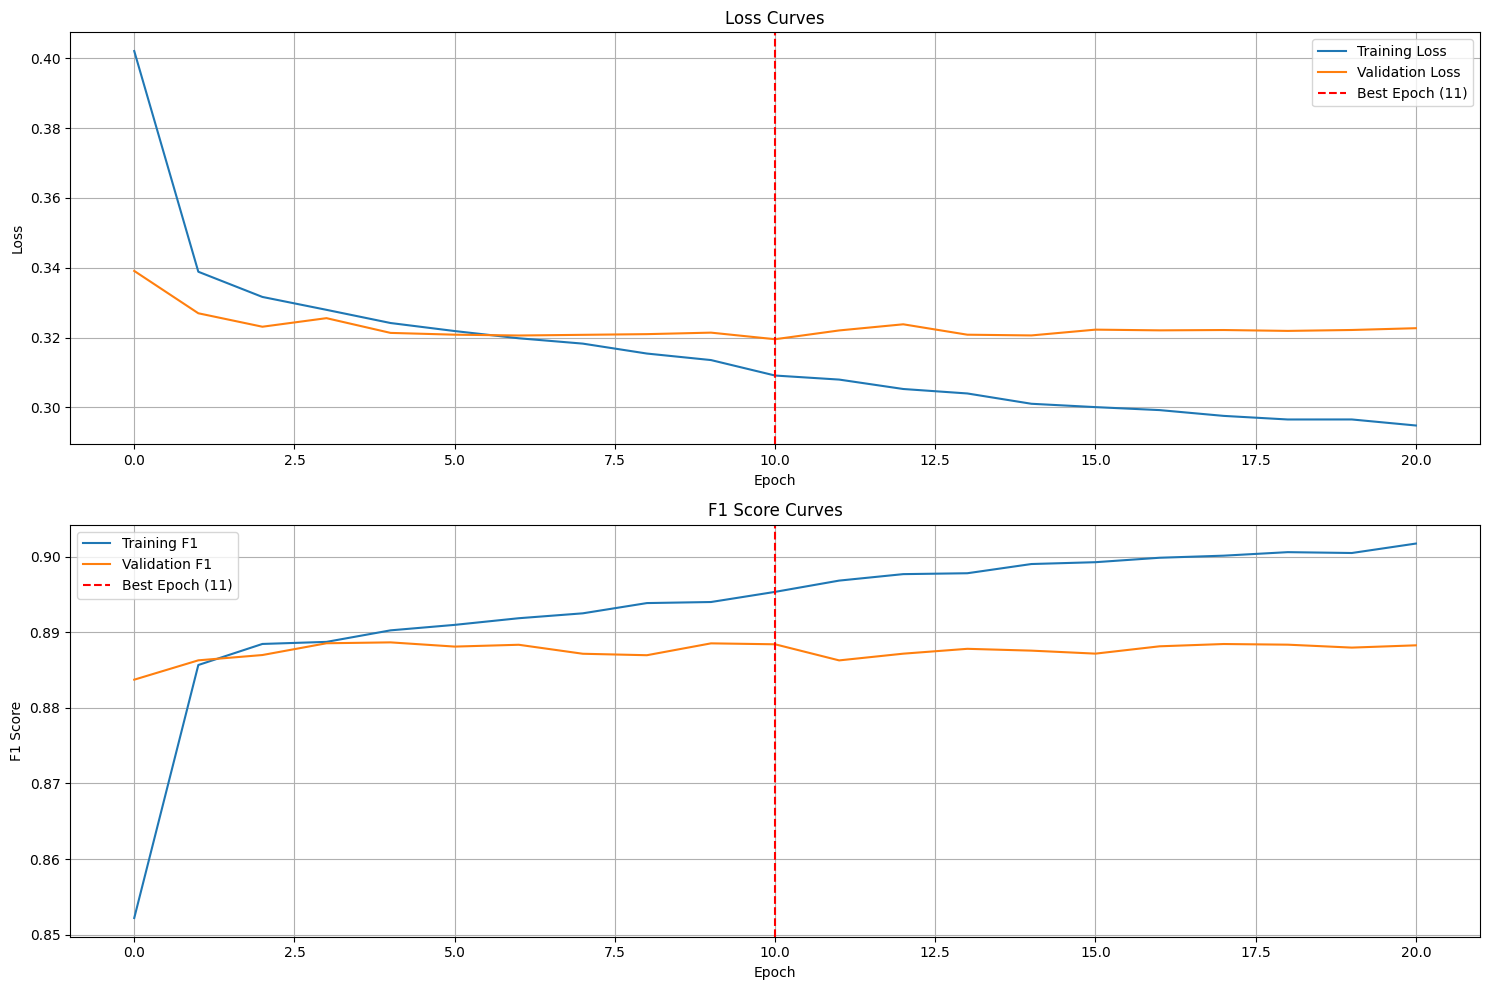


[RESULTS] Best validation loss: 0.3195, F1: 0.8884 at epoch 11

[METRICS] At best epoch 11:
  - Training Loss: 0.3091
  - Validation Loss: 0.3195
  - Training F1: 0.8953
  - Validation F1: 0.8884


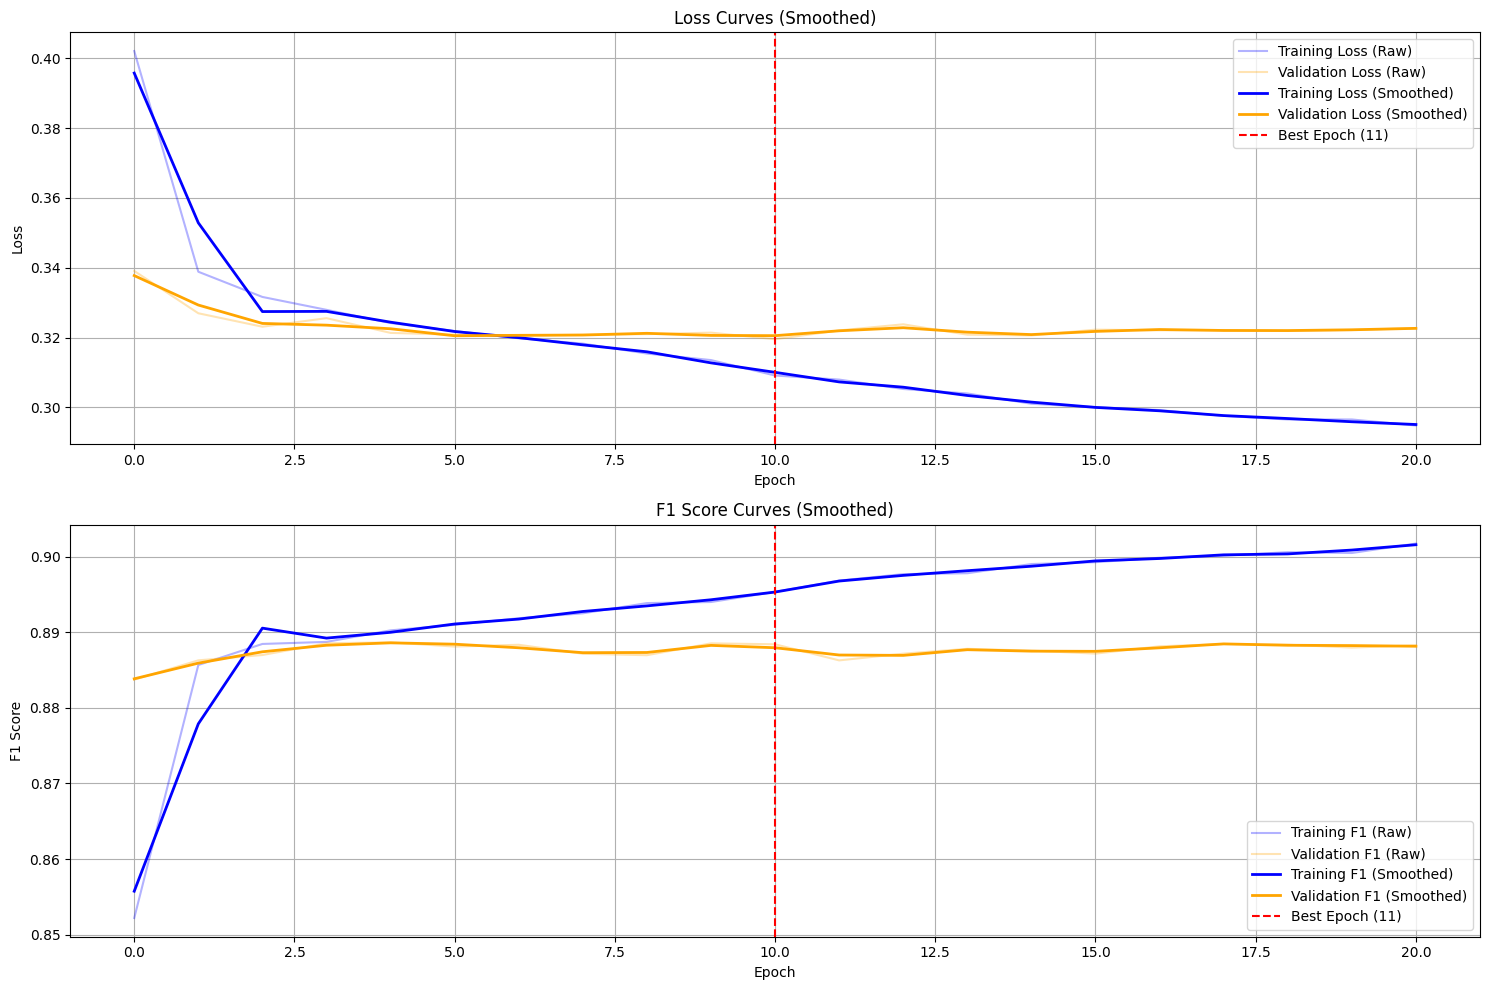


[CONCLUSION] Based on the validation F1 score curves, the optimal number of epochs
             for training the final model is: 11


In [ ]:
# Set global seed for reproducibility
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed and device
seed_everything(42)
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[INFO] Device:", device)

# Load CSVs
train_val_df = pd.read_csv('/content/drive/MyDrive/finetuned_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/finetuned_test_with_structured_final.csv')

# Column definition
numeric_cols = ['goal_usd', 'preparation_days', 'creator_backing_count', 'duration', 'blurb_word_count', 'name_word_count']
categorical_cols = ['country_displayable_name', 'parent_category', 'gender', 'quarter']
bool_cols = ['prelaunch_activated', 'staff_pick', 'has_video']

# log-transform
for col in ['goal_usd', 'preparation_days', 'creator_backing_count']:
    train_val_df[f'log_{col}'] = np.log1p(train_val_df[col])
    test_df[f'log_{col}'] = np.log1p(test_df[col])

numeric_cols = ['log_goal_usd', 'log_preparation_days', 'log_creator_backing_count', 'duration', 'blurb_word_count', 'name_word_count']

# ColumnTransformer definition
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('bool', 'passthrough', bool_cols)
])

# Data convertion
structured_cols = numeric_cols + categorical_cols + bool_cols

X_train_val_structured = preprocessor.fit_transform(train_val_df[structured_cols]).toarray()
X_test_structured = preprocessor.transform(test_df[structured_cols]).toarray()

# Extract text embedding
X_train_val_embed = train_val_df.iloc[:, 0:768].values
X_test_embed = test_df.iloc[:, 0:768].values

# Concetanate
X_train_val_final = np.hstack([X_train_val_embed, X_train_val_structured])
X_test_final = np.hstack([X_test_embed, X_test_structured])

# Tensor convert
X_train_val_tensor = torch.tensor(X_train_val_final, dtype=torch.float32)
y_train_val_tensor = torch.tensor(train_val_df['state_binary'].values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['state_binary'].values.reshape(-1, 1), dtype=torch.float32)

print(f"[INFO] Final Train/Val Shape: {X_train_val_tensor.shape}")
print(f"[INFO] Final Test Shape: {X_test_tensor.shape}")

input_size = X_train_val_tensor.shape[1]

# Model definition
def build_model(input_size, trial):
    n_layers = trial.suggest_int("n_layers", 2, 5)
    base_hidden_size = trial.suggest_categorical("hidden_size", [256, 384, 512])
    activation = trial.suggest_categorical("activation", ["ReLU", "LeakyReLU"])
    dropout = trial.suggest_float("dropout", 0.1, 0.4)

    layers = []
    in_features = input_size
    for i in range(n_layers):
        hidden_size = max(int(base_hidden_size // (1.5 ** i)), 64)
        layers.append(nn.Linear(in_features, hidden_size))

        if activation == "LeakyReLU":
            layers.append(nn.LeakyReLU(0.1))
        else:
            layers.append(getattr(nn, activation)())

        layers.append(nn.Dropout(dropout))
        in_features = hidden_size

    layers.append(nn.Linear(in_features, 1))
    return nn.Sequential(*layers).to(device)

# Training function
loader_kwargs = dict(num_workers=4, pin_memory=True)


def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, patience=10, trial=None, fold_offset=0, delta=1e-4):
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    best_f1 = 0.0

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2
    )

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        val_losses, all_preds, all_labels = [], [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                val_losses.append(criterion(preds, yb).item())
                all_preds.append(torch.sigmoid(preds).cpu())
                all_labels.append(yb.cpu())

        avg_val_loss = np.mean(val_losses)
        preds_bin = (torch.cat(all_preds).numpy() > 0.5).astype(int)
        labels_cat = torch.cat(all_labels).numpy()
        val_f1 = f1_score(labels_cat, preds_bin)

        scheduler.step(avg_val_loss)

        if trial:
            trial.report(val_f1, step=fold_offset + epoch)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

        # Early stopping based on validation loss with delta=1e-4
        if avg_val_loss < best_val_loss - delta:  # Only consider improvement > delta
            best_val_loss = avg_val_loss
            best_f1 = val_f1
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    if best_model_state:
        model.load_state_dict(best_model_state)

    return model, best_f1


# STEP 2: NESTED CV
outer_folds = 5
outer_cv = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=42)
outer_results = []

print("\n" + "="*80)
print(" STARTING NESTED CROSS-VALIDATION")
print("="*80)

for outer_fold, (train_idx, val_idx) in enumerate(outer_cv.split(X_train_val_tensor.numpy(), y_train_val_tensor.numpy())):
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Starting outer fold...")
    # fold별로 새로운 preprocessor 생성
    fold_preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('bool', 'passthrough', bool_cols)
    ])

    # train 데이터만으로 fit
    X_train_structured = fold_preprocessor.fit_transform(train_val_df.iloc[train_idx][structured_cols]).toarray()
    X_val_structured = fold_preprocessor.transform(train_val_df.iloc[val_idx][structured_cols]).toarray()

    # 임베딩과 결합
    X_train_final = np.hstack([X_train_val_embed[train_idx], X_train_structured])
    X_val_final = np.hstack([X_train_val_embed[val_idx], X_val_structured])

    X_train_outer = torch.tensor(X_train_final, dtype=torch.float32)
    y_train_outer = torch.tensor(train_val_df.iloc[train_idx]['state_binary'].values.reshape(-1, 1), dtype=torch.float32)
    X_val_outer = torch.tensor(X_val_final, dtype=torch.float32)
    y_val_outer = torch.tensor(train_val_df.iloc[val_idx]['state_binary'].values.reshape(-1, 1), dtype=torch.float32)

    def objective(trial):
        print(f"Starting Trial #{trial.number+1}/50")
        model = build_model(X_train_outer.shape[1], trial)

        optimizer_name  = trial.suggest_categorical("optimizer", ["Adam", "AdamW"])
        lr              = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
        weight_decay    = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
        batch_size      = trial.suggest_categorical("batch_size", [128, 256, 512])



        patience_param = 10
        criterion = nn.BCEWithLogitsLoss()

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        f1_scores = []

        for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_train_outer.numpy(), y_train_outer.numpy())):
            X_tr, y_tr = X_train_outer[tr_idx], y_train_outer[tr_idx]
            X_va, y_va = X_train_outer[va_idx], y_train_outer[va_idx]

            train_loader = DataLoader(
                TensorDataset(X_tr, y_tr),
                batch_size=batch_size,
                shuffle=True,
                **loader_kwargs
            )
            val_loader = DataLoader(
                TensorDataset(X_va, y_va),
                batch_size=batch_size,
                shuffle=False,
                **loader_kwargs
            )

            model_copy = copy.deepcopy(model)
            optimizer = getattr(optim, optimizer_name)(
                model_copy.parameters(), lr=lr, weight_decay=weight_decay
            )

            # Suppress output during inner CV by passing trial
            trained_model, _ = train_model(
                model_copy, train_loader, val_loader,
                optimizer, criterion, epochs, patience_param,
                trial, fold_idx * epochs
            )

            trained_model.eval()
            with torch.no_grad():
                xb, yb = X_va.to(device), y_va.to(device)
                preds = torch.sigmoid(trained_model(xb)).cpu().numpy()
                preds_bin = (preds > 0.5).astype(int)
                f1_score_fold = f1_score(yb.cpu().numpy(), preds_bin)
                f1_scores.append(f1_score_fold)

        return np.mean(f1_scores)

    print(f"[FOLD {outer_fold + 1}/{outer_folds}] Starting hyperparameter search with Optuna...")

    # Configure Optuna logging to be more concise
    optuna.logging.set_verbosity(optuna.logging.INFO)
    sampler = optuna.samplers.TPESampler(seed=42)
    study = optuna.create_study(
        direction="maximize",
        pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5)
    )
    study.optimize(objective, n_trials=30)

    best_params = study.best_trial.params
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Best hyperparameters:")
    for param_name, param_value in best_params.items():
        print(f"  - {param_name}: {param_value}")

    # Evaluate on outer validation
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Training model with best hyperparameters...")
    final_model = build_model(X_train_outer.shape[1], optuna.trial.FixedTrial(best_params))
    optimizer  = getattr(optim, best_params['optimizer'])(
        final_model.parameters(),
        lr=best_params['lr'],
        weight_decay=best_params['weight_decay']
    )



    criterion = nn.BCEWithLogitsLoss()

    train_loader = DataLoader(
        TensorDataset(X_train_outer, y_train_outer),
        batch_size=best_params['batch_size'], shuffle=True,
        **loader_kwargs
    )
    val_loader = DataLoader(
        TensorDataset(X_val_outer, y_val_outer),
        batch_size=best_params['batch_size'],
        shuffle=False,
        **loader_kwargs
    )

    final_model, _ = train_model(
        final_model, train_loader, val_loader,
        optimizer, criterion, epochs, patience=10, delta=1e-4
    )

    final_model.eval()
    with torch.no_grad():
        xb, yb = X_val_outer.to(device), y_val_outer.to(device)
        preds = torch.sigmoid(final_model(xb)).cpu().numpy()
        preds_bin = (preds > 0.5).astype(int)
        f1 = f1_score(yb.cpu().numpy(), preds_bin)
        auc = roc_auc_score(yb.cpu().numpy(), preds)
        print(f"\n[FOLD {outer_fold+1}/{outer_folds}] Results: F1={f1:.4f}, AUC={auc:.4f}")

    outer_results.append({
        "fold": outer_fold + 1,
        "f1": f1,
        "auc": auc,
        "params": best_params
    })

print("\n" + "="*80)
print(" NESTED CV COMPLETED")
print("="*80)

# Calculate mean performance across outer folds
mean_f1 = np.mean([r["f1"] for r in outer_results])
mean_auc = np.mean([r["auc"] for r in outer_results])
std_f1 = np.std([r["f1"] for r in outer_results])
std_auc = np.std([r["auc"] for r in outer_results])

print(f"\n[RESULTS] Nested CV Results: ")
print(f"  - Avg F1={mean_f1:.4f} (±{std_f1:.4f})")
print(f"  - Avg AUC={mean_auc:.4f} (±{std_auc:.4f})")

# Print detailed results for each fold
print("\n[DETAILED FOLD RESULTS]")
for res in outer_results:
    print(f"  Fold {res['fold']}: F1={res['f1']:.4f}, AUC={res['auc']:.4f}")

# STEP 3: DETERMINE BEST HYPERPARAMETERS FROM BEST FOLD
print("\n" + "="*80)
print(" DETERMINING BEST HYPERPARAMETERS FROM TOP-PERFORMING FOLD")
print("="*80)

# Find the best-performing fold based on F1 score
best_fold_idx = np.argmax([r["f1"] for r in outer_results])
best_fold_params = outer_results[best_fold_idx]["params"]
best_fold_f1 = outer_results[best_fold_idx]["f1"]
best_fold_auc = outer_results[best_fold_idx]["auc"]

# Use the parameters from the best fold
final_params = best_fold_params.copy()

print(f"\n[BEST FOLD] Fold {best_fold_idx + 1} with F1={best_fold_f1:.4f}, AUC={best_fold_auc:.4f}")
print("\n[FINAL HYPERPARAMETERS]")
for key, value in final_params.items():
    if isinstance(value, float):
        print(f"  - {key}: {value:.6f}")
    else:
        print(f"  - {key}: {value}")

# STEP 3: FINAL TRAIN+VAL EVALUATION WITH METRIC TRACKING
print("\n" + "="*80)
print(" TRAINING FINAL MODEL WITH VALIDATION METRICS TRACKING")
print("="*80)

# Create fixed trial with the best parameters
fixed_trial = optuna.trial.FixedTrial(final_params)

# Initialize the final model
final_model = build_model(X_train_val_tensor.shape[1], fixed_trial)
optimizer = getattr(optim, final_params['optimizer'])(
    final_model.parameters(),
    lr=final_params['lr'],
    weight_decay=final_params['weight_decay']
)
criterion = nn.BCEWithLogitsLoss()

# Split train_val data into train and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_val_tensor.numpy(), y_train_val_tensor.numpy(),
    test_size=0.1, stratify=y_train_val_tensor.numpy(), random_state=42
)

# Convert back to tensors
X_train_final = torch.tensor(X_train_final, dtype=torch.float32)
y_train_final = torch.tensor(y_train_final, dtype=torch.float32)
X_val_final = torch.tensor(X_val_final, dtype=torch.float32)
y_val_final = torch.tensor(y_val_final, dtype=torch.float32)

# Create data loaders
train_loader = DataLoader(
    TensorDataset(X_train_final, y_train_final),
    batch_size=final_params['batch_size'],
    shuffle=True,
    **loader_kwargs
)

val_loader = DataLoader(
    TensorDataset(X_val_final, y_val_final),
    batch_size=final_params['batch_size'],
    shuffle=False,
    **loader_kwargs
)


# Metrics tracking function with validation loss as early stopping criterion
def train_with_metrics(model, train_loader, val_loader, optimizer, criterion, epochs, patience=10, delta=1e-4):
    best_val_loss = float('inf')
    best_epoch = 0
    wait = 0
    best_state = copy.deepcopy(model.state_dict())

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_f1s = []
    val_f1s = []

    # Learning Rate Scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2
    )

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_labels = []

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = final_model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * len(xb)
            train_preds.append(torch.sigmoid(outputs).detach().cpu())
            train_labels.append(yb.detach().cpu())

        # Calculate training metrics
        train_loss /= len(train_loader.dataset)
        train_preds_cat = torch.cat(train_preds).numpy()
        train_labels_cat = torch.cat(train_labels).numpy()
        train_f1 = f1_score(train_labels_cat, (train_preds_cat > 0.5).astype(int))

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = final_model(xb)
                loss = criterion(outputs, yb)
                val_loss += loss.item() * len(xb)

                val_preds.append(torch.sigmoid(outputs).cpu())
                val_labels.append(yb.cpu())

        # Calculate validation metrics
        val_loss /= len(val_loader.dataset)
        val_preds_cat = torch.cat(val_preds).numpy()
        val_labels_cat = torch.cat(val_labels).numpy()
        val_f1 = f1_score(val_labels_cat, (val_preds_cat > 0.5).astype(int))

        scheduler.step(val_loss)

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")

        # Early stopping check (based on validation loss with delta=1e-4)
        if val_loss < best_val_loss - delta:  # Only save if improvement is greater than delta
            best_val_loss = val_loss
            best_epoch = epoch
            best_state = copy.deepcopy(model.state_dict())
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping triggered! No significant improvement for {patience} epochs.")
                print(f"Best epoch was {best_epoch+1} with validation loss: {best_val_loss:.6f}")
                break

    # Restore best model
    model.load_state_dict(best_state)

    # Plot training curves
    plt.figure(figsize=(15, 10))

    # Loss curves
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--',
                label=f'Best Epoch ({best_epoch+1})')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # F1 score curves
    plt.subplot(2, 1, 2)
    plt.plot(train_f1s, label='Training F1')
    plt.plot(val_f1s, label='Validation F1')
    plt.axvline(x=best_epoch, color='r', linestyle='--',
                label=f'Best Epoch ({best_epoch+1})')
    plt.title('F1 Score Curves')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Return model and metrics
    return model, {
        'best_epoch': best_epoch,
        'best_val_loss': best_val_loss,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_f1s': train_f1s,
        'val_f1s': val_f1s
    }

# Train with metrics tracking
print("\n[TRACKING] Training final model with metrics tracking...")
final_model, metrics = train_with_metrics(
    final_model, train_loader, val_loader,
    optimizer, criterion, epochs=epochs, patience=10, delta=1e-4
)

# Print results
print(f"\n[RESULTS] Best validation loss: {metrics['best_val_loss']:.4f}, F1: {metrics['val_f1s'][metrics['best_epoch']]:.4f} at epoch {metrics['best_epoch']+1}")

# Calculate and display metrics at best epoch
best_epoch = metrics['best_epoch']
print(f"\n[METRICS] At best epoch {best_epoch+1}:")
print(f"  - Training Loss: {metrics['train_losses'][best_epoch]:.4f}")
print(f"  - Validation Loss: {metrics['val_losses'][best_epoch]:.4f}")
print(f"  - Training F1: {metrics['train_f1s'][best_epoch]:.4f}")
print(f"  - Validation F1: {metrics['val_f1s'][best_epoch]:.4f}")

# Apply smoothing to the curves
from scipy.signal import savgol_filter

# Function to apply smoothing
def apply_smoothing(data, window_length=5, polyorder=2):
    if len(data) <= window_length:
        return data  # Not enough data points for smoothing

    # Ensure window_length is odd
    if window_length % 2 == 0:
        window_length += 1

    return savgol_filter(data, window_length, polyorder)

# Plot smoothed curves
plt.figure(figsize=(15, 10))

# Loss curves (smoothed)
plt.subplot(2, 1, 1)
train_losses = metrics['train_losses']
val_losses = metrics['val_losses']

if len(train_losses) >= 5:  # Only smooth if we have enough points
    train_losses_smooth = apply_smoothing(train_losses)
    val_losses_smooth = apply_smoothing(val_losses)

    plt.plot(train_losses, 'b-', alpha=0.3, label='Training Loss (Raw)')
    plt.plot(val_losses, 'orange', alpha=0.3, label='Validation Loss (Raw)')
    plt.plot(train_losses_smooth, 'b-', linewidth=2, label='Training Loss (Smoothed)')
    plt.plot(val_losses_smooth, 'orange', linewidth=2, label='Validation Loss (Smoothed)')
else:
    plt.plot(train_losses, 'b-', label='Training Loss')
    plt.plot(val_losses, 'orange', label='Validation Loss')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch+1})')
plt.title('Loss Curves (Smoothed)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# F1 score curves (smoothed)
plt.subplot(2, 1, 2)
train_f1s = metrics['train_f1s']
val_f1s = metrics['val_f1s']

if len(train_f1s) >= 5:  # Only smooth if we have enough points
    train_f1s_smooth = apply_smoothing(train_f1s)
    val_f1s_smooth = apply_smoothing(val_f1s)

    plt.plot(train_f1s, 'b-', alpha=0.3, label='Training F1 (Raw)')
    plt.plot(val_f1s, 'orange', alpha=0.3, label='Validation F1 (Raw)')
    plt.plot(train_f1s_smooth, 'b-', linewidth=2, label='Training F1 (Smoothed)')
    plt.plot(val_f1s_smooth, 'orange', linewidth=2, label='Validation F1 (Smoothed)')
else:
    plt.plot(train_f1s, 'b-', label='Training F1')
    plt.plot(val_f1s, 'orange', label='Validation F1')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch+1})')
plt.title('F1 Score Curves (Smoothed)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n[CONCLUSION] Based on the validation F1 score curves, the optimal number of epochs")
print(f"             for training the final model is: {best_epoch+1}")


 EVALUATING FINAL MODEL ON TEST SET

[TEST RESULTS]
  - F1 Score: 0.8676
  - Precision: 0.8381
  - Recall: 0.8992
  - AUC: 0.9043


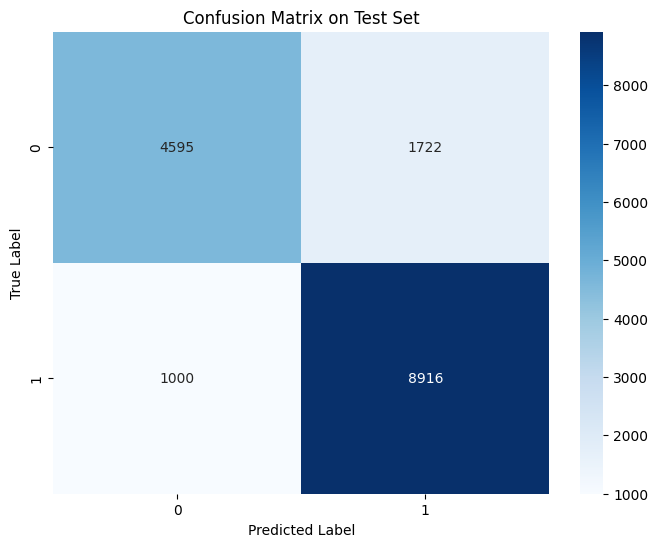

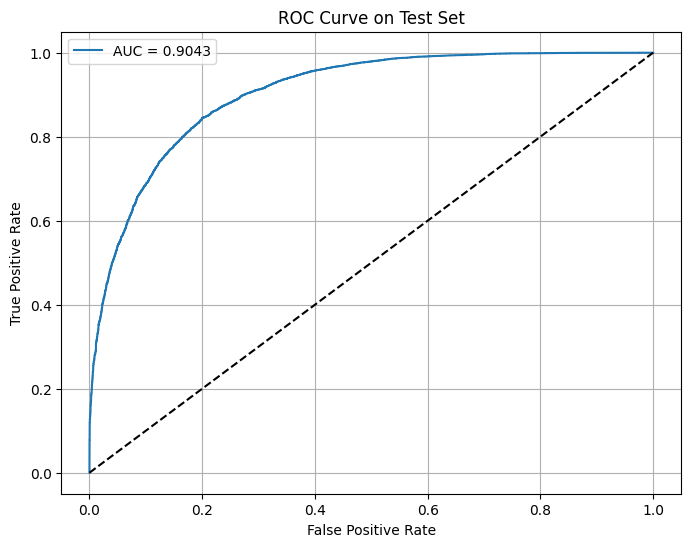

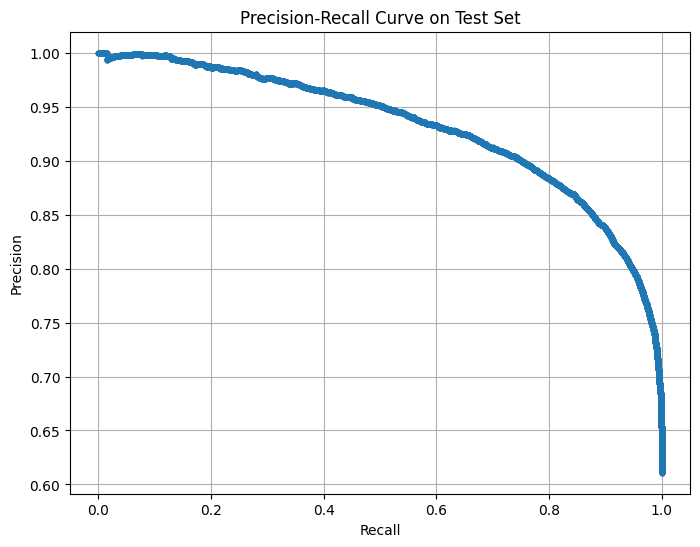


[INFO] Final model saved to /content/drive/MyDrive/MLP_Structured_finetuned_final_code_result/final_trained_model.pt


In [ ]:
# STEP 4: EVALUATE ON TEST SET
print("\n" + "="*80)
print(" EVALUATING FINAL MODEL ON TEST SET")
print("="*80)

# Create test data loader
test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor),
    batch_size=final_params['batch_size'],
    shuffle=False,
    **loader_kwargs
)

# Evaluate on test set
final_model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        outputs = final_model(xb)

        test_preds.append(torch.sigmoid(outputs).cpu())
        test_labels.append(yb.cpu())

# Calculate and report metrics
test_preds_cat = torch.cat(test_preds).numpy()
test_labels_cat = torch.cat(test_labels).numpy()
test_preds_bin = (test_preds_cat > 0.5).astype(int)

# Calculate metrics
test_f1 = f1_score(test_labels_cat, test_preds_bin)
test_precision = precision_score(test_labels_cat, test_preds_bin)
test_recall = recall_score(test_labels_cat, test_preds_bin)
test_auc = roc_auc_score(test_labels_cat, test_preds_cat)

# Print results
print("\n[TEST RESULTS]")
print(f"  - F1 Score: {test_f1:.4f}")
print(f"  - Precision: {test_precision:.4f}")
print(f"  - Recall: {test_recall:.4f}")
print(f"  - AUC: {test_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(test_labels_cat, test_preds_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.grid(True)
plt.show()

# Save model
model_path = "/content/drive/MyDrive/MLP_Structured_finetuned_final_code_result/final_trained_model.pt"
torch.save({
    'model_state_dict': final_model.state_dict(),
    'hyperparameters': final_params,
    'metrics': {
        'train_f1': metrics['train_f1s'][metrics['best_epoch']],
        'val_f1': metrics['val_f1s'][metrics['best_epoch']],
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_auc': test_auc
    }
}, model_path)

print(f"\n[INFO] Final model saved to {model_path}")

In [ ]:
# Python Code to Save All Relevant Files for Future Reference
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

# Directory for saving
save_dir = "/content/drive/MyDrive/MLP_Structured_finetuned_final_code_result"
os.makedirs(save_dir, exist_ok=True)

# Save country performance analysis CSV
country_results_df.to_csv(os.path.join(save_dir, "country_performance_analysis.csv"), index=False)

# Save test set predictions and labels
test_predictions_df = pd.DataFrame({
    'actual_labels': test_labels_cat.flatten(),
    'predicted_labels': test_preds_bin.flatten(),
    'predicted_probabilities': test_preds_cat.flatten()
})
test_predictions_df.to_csv(os.path.join(save_dir, "test_predictions.csv"), index=False)

# Save final model with state_dict, hyperparameters, and metrics
model_path = os.path.join(save_dir, "final_trained_model.pt")
torch.save({
    'model_state_dict': final_model.state_dict(),
    'hyperparameters': final_params,
    'metrics': {
        'train_f1': metrics['train_f1s'][metrics['best_epoch']],
        'val_f1': metrics['val_f1s'][metrics['best_epoch']],
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_auc': test_auc
    }
}, model_path)

# Save confusion matrix plot
cm = confusion_matrix(test_labels_cat, test_preds_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(os.path.join(save_dir, "test_confusion_matrix.png"))
plt.close()

# Save ROC curve plot
fpr, tpr, _ = roc_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "test_roc_curve.png"))
plt.close()

# Save Precision-Recall curve plot
precision, recall, _ = precision_recall_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.grid(True)
plt.savefig(os.path.join(save_dir, "test_precision_recall_curve.png"))
plt.close()

print(f"\n[INFO] All relevant files have been saved to: {save_dir}")



[INFO] All relevant files have been saved to: /content/drive/MyDrive/MLP_Structured_finetuned_final_code_result
